# Introduction to Matplotlib

In [1]:
%config Completer.use_jedi = False

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[]

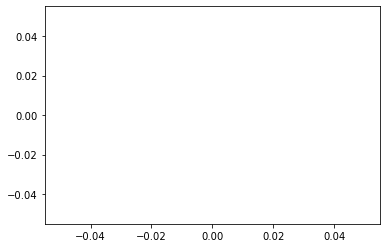

In [3]:
plt.plot()

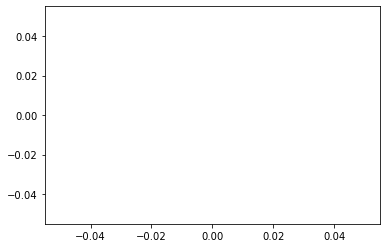

In [4]:
plt.plot();

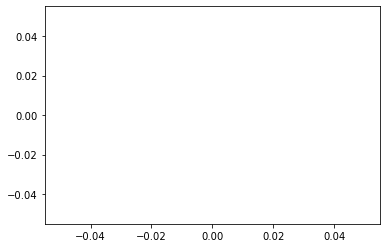

In [5]:
plt.plot()
plt.show()

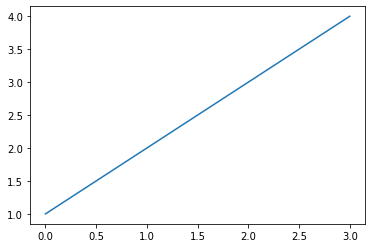

In [6]:
plt.plot([1, 2, 3, 4]);

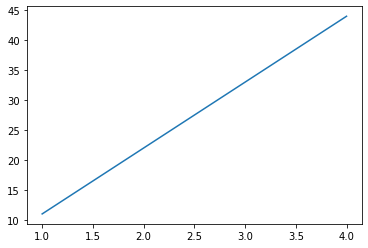

In [7]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x, y);

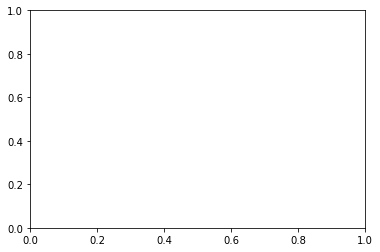

In [8]:
# 1st method
fig = plt.figure() # Creates a figure
ax = fig.add_subplot() # Adds some axes
plt.show()

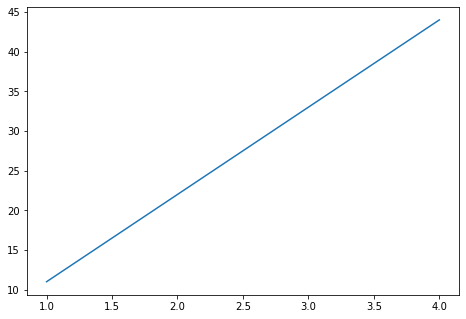

In [9]:
# 2nd method
fig = plt.figure() # Creates a figure
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y)
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

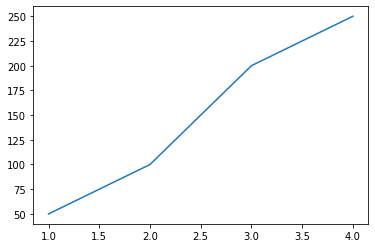

In [10]:
# 3rd method (recommended)
fix, ax = plt.subplots()
ax.plot(x, [50, 100, 200, 250]);
type(fig), type(ax)

 ![](matplotlib-anatomy-of-a-plot.png)

## Matplotlib example workflow

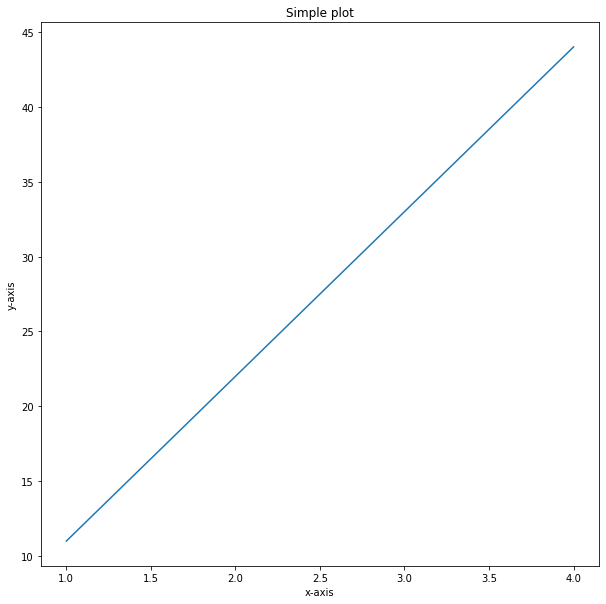

In [11]:
# 0. import matplotlib and get it ready for plotting in jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10,10)) # (width, height)

# 3. Plot data
ax.plot(x, y)

# 4. Customise plot
ax.set(title="Simple plot",
       xlabel="x-axis",
       ylabel="y-axis")

# 5. Save & show (you save the whole figure)
fig.savefig("images/sample-plot.png")

## Making figures with NumPy arrays

We want:
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplot

In [12]:
import numpy as np

In [13]:
# Create some data
x = np.linspace(-10, 10, 100)
x[:10]

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818])

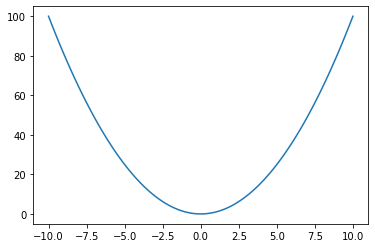

In [14]:
 # Plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x, x**2);

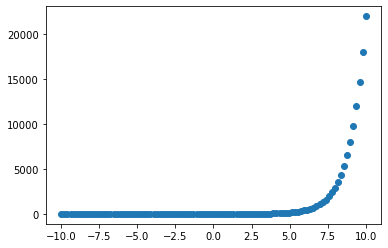

In [15]:
# Use the same data to make a scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

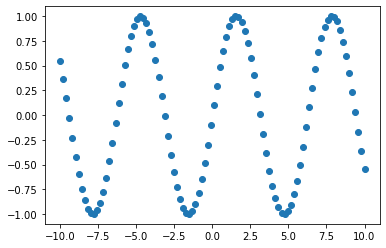

In [16]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

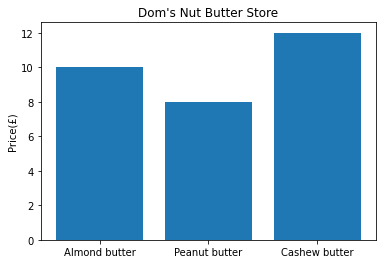

In [17]:
# Make a plot from dictionary
nut_butter_prices = {"Almond butter": 10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fix, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Dom's Nut Butter Store",
       ylabel = "Price(£)");

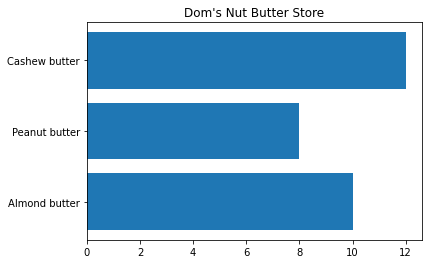

In [18]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()))
ax.set(title="Dom's Nut Butter Store");

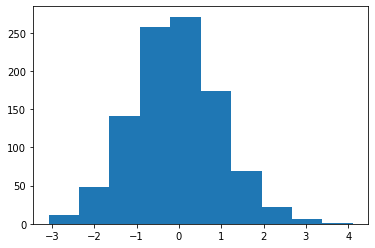

In [19]:
# Make some data for histograms and plot it
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

 ### Two options for subplots

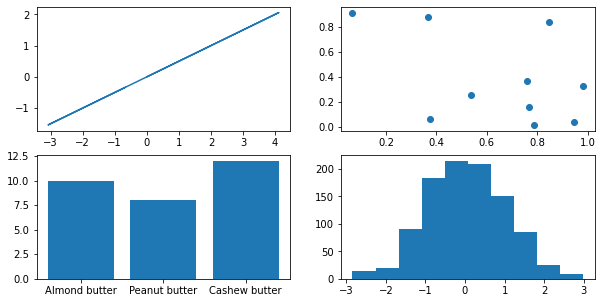

In [20]:
# Subplot option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                             ncols=2,
                                             figsize=(10,5))
# Plot to each axis
ax1.plot(x, x/2)
ax2.scatter(np.random.random(10), np.random.random(10))
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax4.hist(np.random.randn(1000));

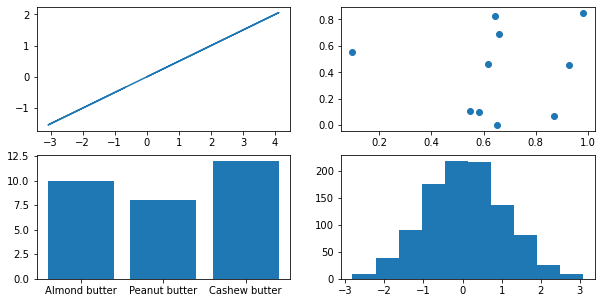

In [21]:
# Subplots option 2
fix, ax = plt.subplots(nrows=2,
                       ncols=2,
                       figsize=(10, 5))
# Plot to each different index
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10))
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax[1, 1].hist(np.random.randn(1000));

## Plotting from pandas Dataframes

In [22]:
import pandas as pd

In [23]:
# Make a dataframe
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


<AxesSubplot:>

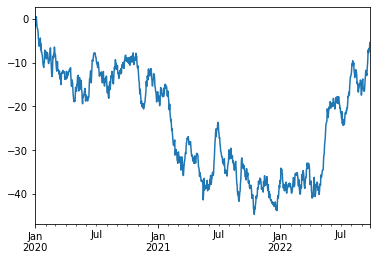

In [24]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range("1/1/2020", periods=1000))
ts = ts.cumsum()
ts.plot()

In [25]:
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')
car_sales

<ipython-input-25-737e371af5b4>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [26]:
# remove last 2 zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [27]:
car_sales["Sale date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [28]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


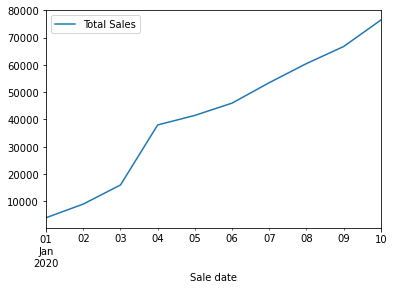

In [29]:
# Let's plot the total sales
car_sales.plot(x="Sale date", y="Total Sales"); # This is pandas using the matplotlib API, so the format is different

<AxesSubplot:xlabel='Odometer (KM)', ylabel='Price'>

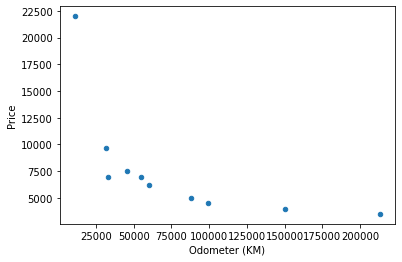

In [30]:
car_sales["Price"] = car_sales["Price"].astype(int) # casting the price variable from str to int
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter")

In [31]:
# Bar graph
x = np.random.rand(10, 4) # 10 rows, 4 columns
x

# Turn it into a dataframe
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.932663,0.245276,0.026065,0.736936
1,0.333386,0.422793,0.427912,0.147782
2,0.719265,0.092519,0.058084,0.564070
3,0.929215,0.983682,0.906233,0.498960
4,0.580822,0.100469,0.246119,0.267117
5,0.117495,0.486153,0.158339,0.313474
6,0.149487,0.663872,0.768410,0.255547
7,0.202064,0.607063,0.708608,0.033665
8,0.377296,0.411371,0.764633,0.931744
9,0.586758,0.937796,0.880982,0.510519


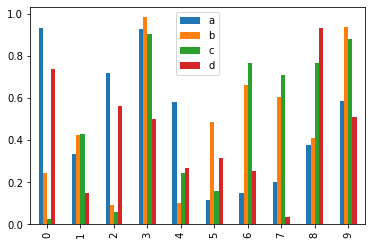

In [32]:
df.plot.bar();

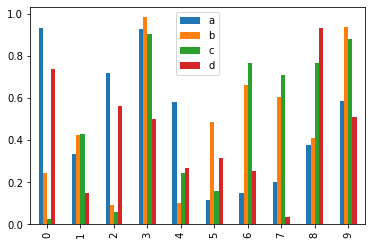

In [33]:
df.plot(kind="bar"); # 2 different ways to plot a bar graph

In [34]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


<AxesSubplot:xlabel='Make'>

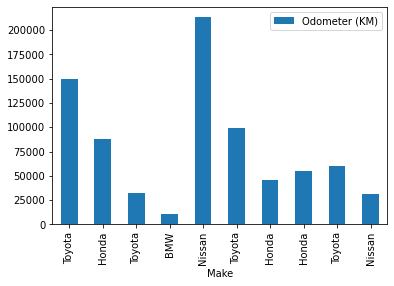

In [35]:
car_sales.plot(x="Make", y="Odometer (KM)", kind='bar')

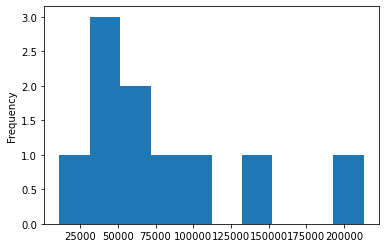

In [36]:
# Histogram
car_sales["Odometer (KM)"].plot.hist();

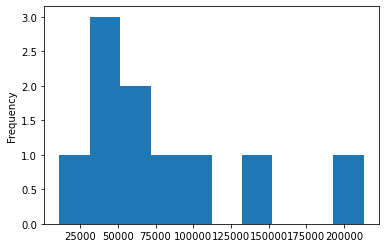

In [37]:
car_sales["Odometer (KM)"].plot(kind="hist");

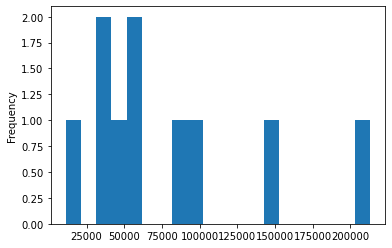

In [38]:
car_sales["Odometer (KM)"].plot.hist(bins=20); # Bins = number of columns (default is 10)

In [39]:
# x = np.random.randint(0, 100, size=(3,5))
# y = np.linspace(0, 10, num=1000)
# fig, ax = plt.subplots()
# ax.scatter(y, np.sin(y))

In [40]:
# New dataset
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<AxesSubplot:ylabel='Frequency'>

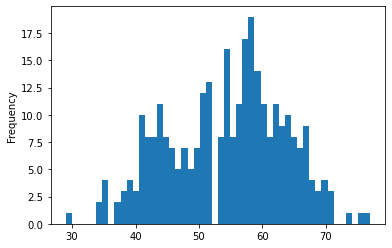

In [41]:
# Create a histogram of age
heart_disease["age"].plot.hist(bins=50)

In [42]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


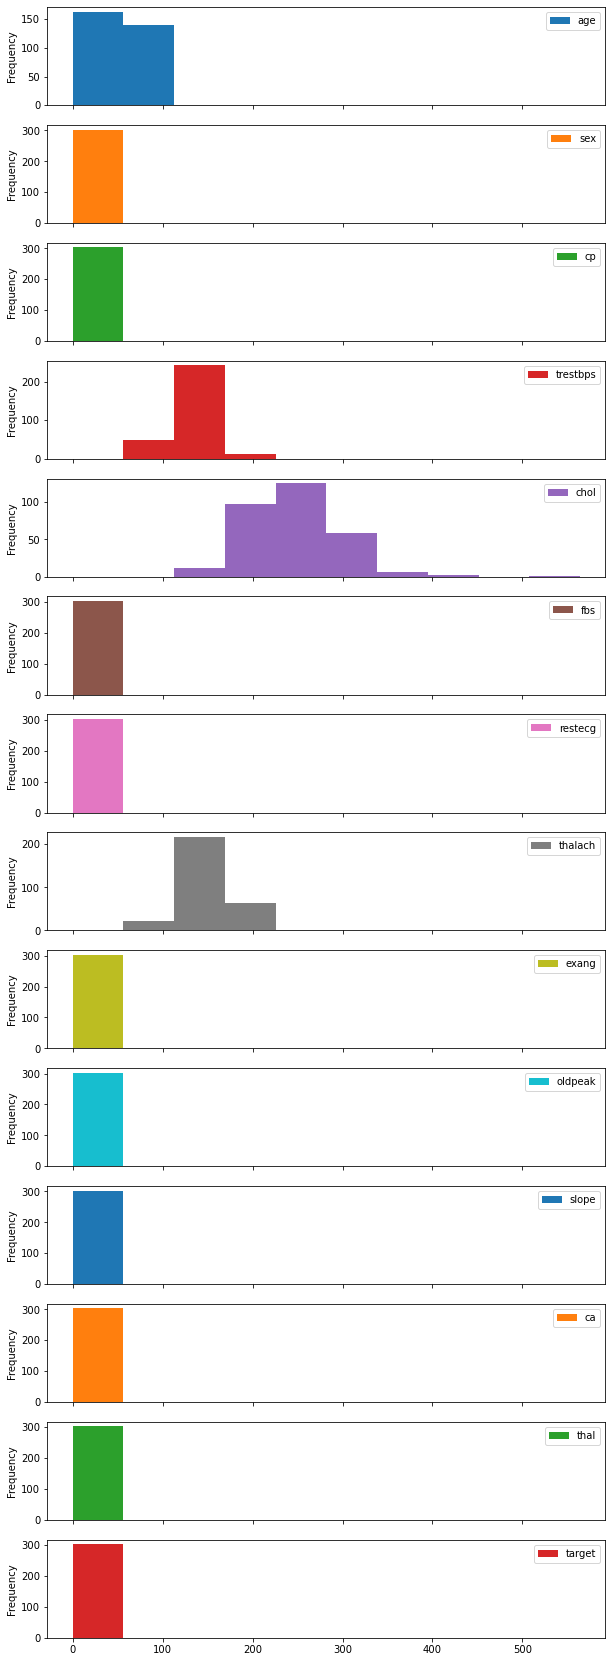

In [43]:
heart_disease.plot.hist(figsize=(10, 30), subplots=True);

### Which one should you use (pyplot vs matplotlib OO method)?

* When plotting something quickly, okay to use the pyplot method
* When plotting something more advanced, use the OO method

In [44]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()
len(over_50)

208

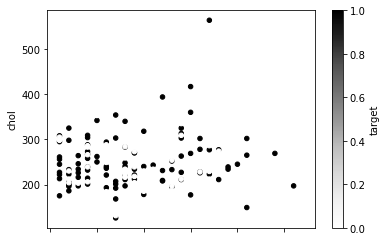

In [45]:
# Pyplot method
over_50.plot(kind="scatter",
             x='age',
             y='chol',
             c='target'); # C stands for colour

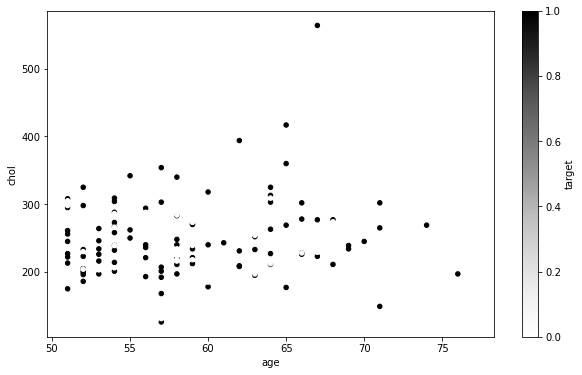

In [46]:
# OO method mixed with pyplot method
fig, ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind='scatter',
             x='age',
             y='chol',
             c='target',
             ax=ax);
# ax.set_xlim([45,100]) # Sets limitations of x axis

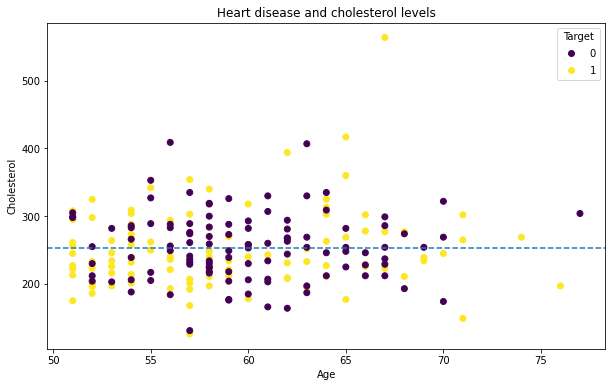

In [47]:
# OO method from scratch
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"]);

# Customise
ax.set(title="Heart disease and cholesterol levels",
       xlabel="Age",
       ylabel="Cholesterol");

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
           linestyle="dashed");

In [48]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


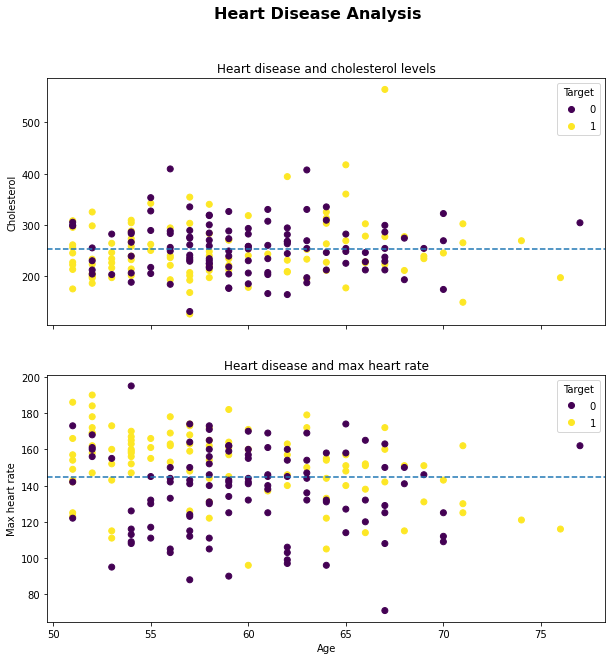

In [49]:

# Subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(10,10),
                               sharex=True);
# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                      y=over_50["chol"],
                      c=over_50["target"]);
# Customise ax0
ax0.set(title="Heart disease and cholesterol levels",
#         xlabel="Age",
        ylabel="Cholesterol");
# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target");
# Add a mean line
ax0.axhline(y=over_50["chol"].mean(),
            linestyle="--");


# Add data to ax1
scatter = ax1.scatter(x=over_50["age"],
                      y=over_50["thalach"],
                      c=over_50["target"]);
# Customise ax1
ax1.set(title="Heart disease and max heart rate",
        xlabel="Age",
        ylabel="Max heart rate");
# Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target");
# Add a mean line
ax1.axhline(y=over_50["thalach"].mean(),
            linestyle="--");

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

## Customising Matplotlib plots

In [50]:
# See the different style available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

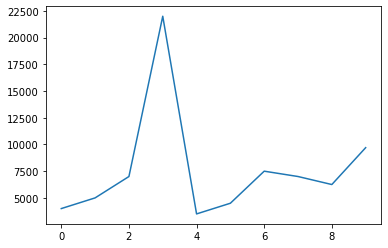

In [51]:
car_sales["Price"].plot();

In [52]:
plt.style.use('seaborn-whitegrid')

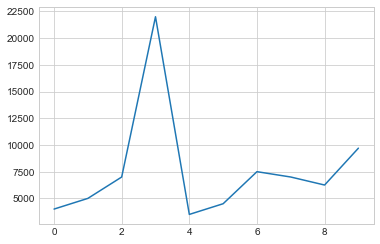

In [53]:
car_sales["Price"].plot();

In [54]:
plt.style.use('seaborn')

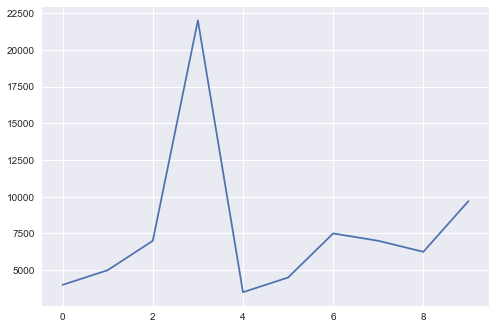

In [55]:
car_sales["Price"].plot();

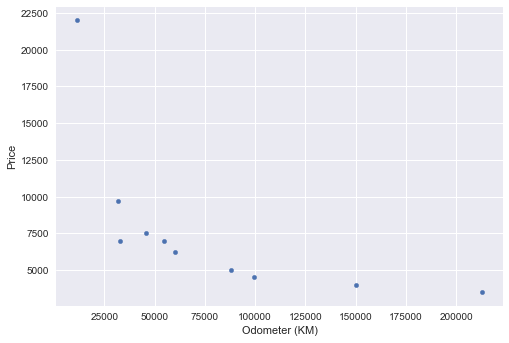

In [56]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

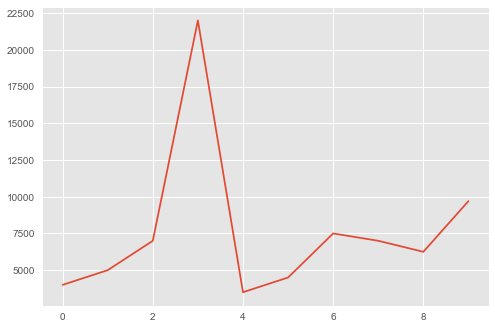

In [57]:
plt.style.use('ggplot')
car_sales["Price"].plot();

In [58]:
# Create some data
x = np.random.randn(10, 4)
x

array([[ 6.20024851e-01,  1.43652520e+00,  1.25671213e+00,
         3.29373578e+00],
       [-4.16034747e-01,  1.24950120e-01, -1.31101521e+00,
         1.32129686e+00],
       [ 1.80371920e+00, -3.43906365e-01,  8.46870708e-01,
        -9.39793200e-01],
       [ 4.77449944e-01, -1.99252285e+00, -6.77948436e-01,
        -1.13634123e+00],
       [ 2.16942443e+00, -1.63277481e+00,  7.64571685e-01,
        -3.82169109e-01],
       [ 2.63704948e+00,  1.76132720e-01,  1.33475917e+00,
         8.97125884e-01],
       [ 1.06417398e+00, -4.18224533e-02, -3.24520232e-01,
        -2.32774267e-01],
       [-9.43797357e-01, -9.04626985e-04,  1.13184924e+00,
        -1.00326805e+00],
       [-4.40740676e-01,  1.68752897e+00, -9.97966521e-01,
        -9.45465963e-01],
       [ 1.30748930e-01,  5.66617234e-01,  3.84571226e-01,
         3.76750430e-01]])

In [59]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.620025,1.436525,1.256712,3.293736
1,-0.416035,0.124950,-1.311015,1.321297
2,1.803719,-0.343906,0.846871,-0.939793
3,0.477450,-1.992523,-0.677948,-1.136341
4,2.169424,-1.632775,0.764572,-0.382169
5,2.637049,0.176133,1.334759,0.897126
6,1.064174,-0.041822,-0.324520,-0.232774
7,-0.943797,-0.000905,1.131849,-1.003268
8,-0.440741,1.687529,-0.997967,-0.945466
9,0.130749,0.566617,0.384571,0.376750


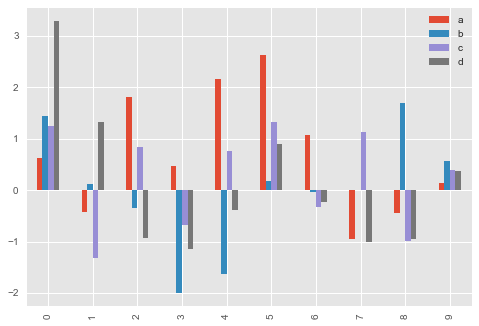

In [60]:
ax = df.plot(kind='bar')

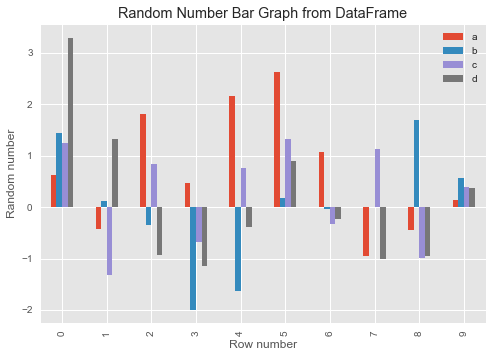

In [61]:
# Customise plot with set() method
ax = df.plot(kind='bar')
# Add some labels and a title
ax.set(title="Random Number Bar Graph from DataFrame",
       xlabel="Row number",
       ylabel="Random number")
# Make legend visible
ax.legend().set_visible(True)

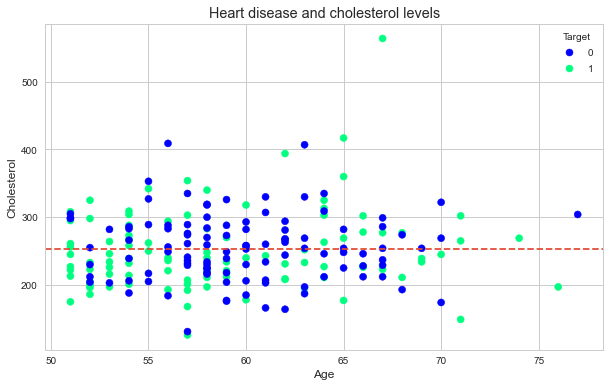

In [62]:
# Set the style
plt.style.use('seaborn-whitegrid')

# OO method from scratch
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"],
                     cmap="winter"); # changes the colour scheme (use winter or summer)

# Customise
ax.set(title="Heart disease and cholesterol levels",
       xlabel="Age",
       ylabel="Cholesterol");

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
           linestyle="dashed");

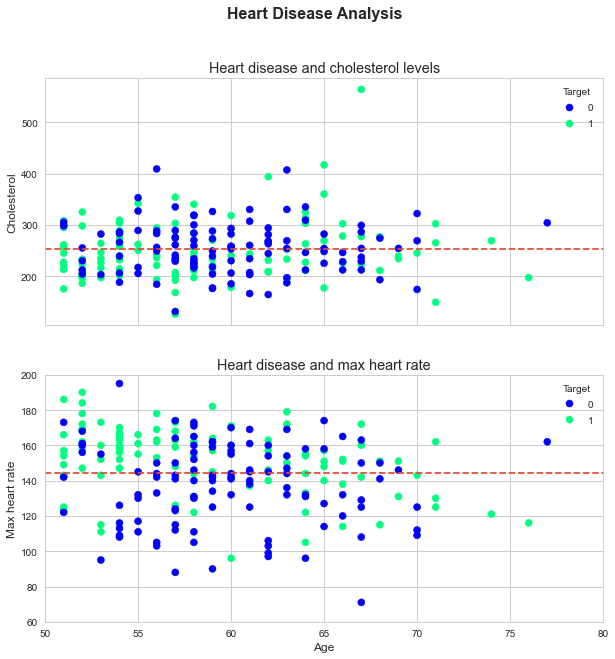

In [67]:
# Customising the x and y axis limitations


# Subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(10,10),
                               sharex=True);
# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                      y=over_50["chol"],
                      c=over_50["target"],
                      cmap='winter');
# Customise ax0
ax0.set(title="Heart disease and cholesterol levels",
#         xlabel="Age",
        ylabel="Cholesterol")
# Change the x axis limits
ax0.set_xlim([50, 80])
# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target");
# Add a mean line
ax0.axhline(y=over_50["chol"].mean(),
            linestyle="--");


# Add data to ax1
scatter = ax1.scatter(x=over_50["age"],
                      y=over_50["thalach"],
                      c=over_50["target"],
                      cmap="winter");
# Customise ax1
ax1.set(title="Heart disease and max heart rate",
        xlabel="Age",
        ylabel="Max heart rate");
# Change ax1 x axis limits (isn't necessary because of shared axis)
ax1.set_xlim([50, 80])
ax1.set_ylim([60, 200])

# Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target");
# Add a mean line
ax1.axhline(y=over_50["thalach"].mean(),
            linestyle="--");

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

### Saving plots

Option 1: right click the figure and save image as

Option 2:

In [68]:
fig.savefig("heart-disease-analysis-plot.png")